## A. Thu thập dữ liệu

### 1. Lý do lựa chọn tập dữ liệu
Tập dữ liệu này về các bài hát của nhiều nghệ sĩ trên toàn thế giới là một tài nguyên quý giá cho các nhà phân tích dữ liệu và nhà nghiên cứu âm nhạc. Dưới đây là một số lý do để chọn tập dữ liệu này:

- Độ phong phú: Tập dữ liệu này chứa thông tin về các bài hát của nhiều nghệ sĩ trên toàn thế giới, cho phép phân tích so sánh và đánh giá giữa các nghệ sĩ, thị trường âm nhạc khác nhau.

- Dữ liệu thống kê từ hai nguồn đáng tin cậy: Tập dữ liệu này cung cấp thông tin về số lượt nghe trên Spotify và số lượt xem trên YouTube, là hai nguồn đáng tin cậy để đánh giá sự phổ biến của một bài hát.

- Sẵn có và dễ truy cập: Dữ liệu về âm nhạc trên Spotify và YouTube đã được công khai và dễ dàng truy cập, do đó tập dữ liệu này có thể được dễ dàng thu thập và sử dụng.

### 2. Thông tin về tập dữ liệu
#### 2.1. Chủ đề và nguồn
- Chủ đề: Songs in Spotify and Youtube
- Nguồn: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube
#### 2.2. Giấy phép
- [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)
#### 2.3. Phương pháp thu thập
- Source: Spotify, Youtube
- Phương pháp thu thập: APIs
#### 2.4. Thông tin thêm
Bộ dữ liệu các bài hát của nhiều nghệ sĩ khác nhau trên thế giới và với mỗi bài hát:
- Một số thống kê về phiên bản nhạc trên spotify, bao gồm số lượt stream;
- Số lượt xem MV chính thức của bài hát trên youtube.

Dữ liệu bao gồm 26 biến cho mỗi bài hát được thu thập từ spotify. Các biến này được mô tả như sau:
- **Track**: tên của bài hát, như hiển thị trên nền tảng Spotify.
- **Artist**: name of the nghệ sĩ.
- **Url_spotify**: URL của bài hát.
- **Album**: album chứa bài hát trên Spotify.
- **Album_type**: cho biết bài hát được phát hành trên Spotify dưới dạng đĩa đơn hay nằm trong album
- **Uri**: một liên kết spotify được sử dụng để tìm bài hát thông qua API.
- **Danceability**: mô tả mức độ phù hợp của một bản nhạc để khiêu vũ dựa trên sự kết hợp của các yếu tố âm nhạc bao gồm nhịp độ, độ ổn định của nhịp điệu, độ mạnh của nhịp và tính đều đặn tổng thể. Giá trị 0,0 là ít nhảy nhất và 1,0 là dễ nhảy nhất.
- **Energy**: à thước đo từ 0,0 đến 1,0 và đại diện cho thước đo cảm tính về cường độ và hoạt động. Thông thường, các bản nhạc sôi động có cảm giác nhanh, ồn ào và ồn ào. Ví dụ, death metal có năng lượng cao, trong khi khúc dạo đầu của Bach đạt điểm thấp trên thang điểm. Các tính năng cảm nhận góp phần vào thuộc tính này bao gồm phạm vi động, âm lượng cảm nhận được, âm sắc, tốc độ khởi động và entropy chung.
- **Key**: khóa của bản nhạc. Các số nguyên ánh xạ tới cao độ bằng cách sử dụng ký hiệu Lớp cao độ tiêu chuẩn. Ví dụ. 0 = C, 1 = C♯/D♭, 2 = D, v.v. Nếu không có khóa nào được phát hiện, giá trị là -1.
- **Loudness**: độ ồn tổng thể của một bản nhạc tính bằng decibel (dB). Giá trị độ ồn được tính trung bình trên toàn bộ rãnh và rất hữu ích để so sánh độ ồn tương đối của các rãnh. Độ to là chất lượng của âm thanh là mối tương quan tâm lý chính của sức mạnh thể chất (biên độ). Các giá trị thường nằm trong khoảng từ -60 đến 0 db.
- **Speechiness**: phát hiện sự hiện diện của lời nói trong một bản nhạc. Bản ghi âm càng giống giọng nói (ví dụ: chương trình trò chuyện, sách nói, thơ) thì giá trị thuộc tính càng gần 1.0. Các giá trị trên 0,66 mô tả các bản nhạc có thể được tạo hoàn toàn bằng lời nói. Các giá trị từ 0,33 đến 0,66 mô tả các bản nhạc có thể chứa cả nhạc và lời nói, theo từng phần hoặc theo lớp, bao gồm cả các trường hợp như nhạc rap. Các giá trị dưới 0,33 rất có thể đại diện cho âm nhạc và các bản nhạc không giống như lời nói khác.
- **Acousticness**: thước đo độ tin cậy từ 0,0 đến 1,0 cho dù bản nhạc có âm thanh hay không. 1.0 thể hiện độ tin cậy cao của bản nhạc là âm thanh.
- **Instrumentalness**: dự đoán liệu một bản nhạc có chứa giọng hát hay không. Âm thanh "Ooh" và "aah" được coi là nhạc cụ trong ngữ cảnh này. Các bản nhạc rap hoặc lời nói rõ ràng là "giọng hát". Giá trị của nhạc cụ càng gần với 1.0, thì càng có nhiều khả năng bản nhạc không chứa nội dung giọng hát. Các giá trị trên 0,5 nhằm biểu thị các bản nhạc cụ, nhưng độ tin cậy cao hơn khi giá trị này tiến gần đến 1,0.
- **Liveness**: phát hiện sự hiện diện của khán giả trong bản ghi. Giá trị liveness cao hơn thể hiện khả năng bản nhạc được biểu diễn trực tiếp tăng lên. Giá trị trên 0,8 cho thấy khả năng cao là bản nhạc đang hoạt động.
- **Valence**: một thước đo từ 0,0 đến 1,0 mô tả tính tích cực âm nhạc được truyền tải bởi một bản nhạc. Các bản nhạc có hóa trị cao nghe tích cực hơn (ví dụ: vui vẻ, sảng khoái, hưng phấn), trong khi các bản nhạc có hóa trị thấp nghe có vẻ tiêu cực hơn (ví dụ: buồn, chán nản, tức giận).
- **Tempo**: nhịp độ ước tính tổng thể của một bản nhạc tính bằng nhịp mỗi phút (BPM). Trong thuật ngữ âm nhạc, nhịp độ là tốc độ hoặc tốc độ của một bản nhạc nhất định và xuất phát trực tiếp từ thời lượng phách trung bình.
- **Duration_ms**: thời lượng của bản nhạc tính bằng mili giây.
- **Stream**: số lượt stream của bài hát trên Spotify.
- **Url_youtube**: url của video được liên kết với bài hát trên Youtube, nếu có.
- **Title**: tiêu đề của videoclip trên youtube.
- **Channel**: tên của kênh đã xuất bản video.
- **Views**: số lượt xem trên Youtube.
- **Likes**: số lượt like trên Youtube.
- **Comments**: số lượt comment trên Youtube.
- **Description**: mô tả video trên Youtube.
- **Licensed**: Cho biết liệu video có đại diện cho nội dung được cấp phép hay không, điều đó có nghĩa là nội dung đã được tải lên kênh được liên kết với đối tác nội dung của YouTube và sau đó được đối tác đó xác nhận quyền sở hữu.
- **official_video**: giá trị boolean cho biết liệu video được tìm thấy có phải là video chính thức của bài hát hay không.

***

## B. Khám phá dữ liệu

### 1. Đọc dữ liệu, tính số dòng và số cột

Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
#read data
df = pd.read_csv("Spotify_Youtube.csv")

In [3]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
num_rows, num_columns = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_columns}')

Number of rows: 20718
Number of columns: 28


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng là thông tin của một bài hát trên spotify và youtube tương ứng. Có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau, tức không có dòng nào bị 'lạc loài'

Kiểm tra xem có dòng nào bị lặp hay không?

In [5]:
df.duplicated().any()

False

Như vậy, không có dòng nào bị lặp

### 3. Mỗi cột có ý nghĩa gì? 

Ý nghĩa của mỗi cột đã được đề cập ở phần A

### 4. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [6]:
df.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

Các cột đã có kiểu dữ liệu phù hợp để có thể tiếp tục xử lý

Nhận thấy có những cột không cần thiết, ta sẽ tiến hành bỏ đi những cột đó

In [7]:
url_cols = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description']
df.drop(url_cols, axis=1, inplace=True)

In [8]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.772,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.852,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.551,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.578,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.525,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


Kiểm tra tỉ lệ phần trăm giá trị thiếu của mỗi cột

In [9]:
missing_ratio = df.isnull().sum()/num_rows
missing_ratio

Artist              0.000000
Track               0.000000
Album               0.000000
Album_type          0.000000
Danceability        0.000097
Energy              0.000097
Key                 0.000097
Loudness            0.000097
Speechiness         0.000097
Acousticness        0.000097
Instrumentalness    0.000097
Liveness            0.000097
Valence             0.000097
Tempo               0.000097
Duration_ms         0.000097
Channel             0.022686
Views               0.022686
Likes               0.026113
Comments            0.027464
Licensed            0.022686
official_video      0.022686
Stream              0.027802
dtype: float64

In [10]:
#get numerical columns have missing value
missing_columns = []
for i in df.columns:
    if (df[i].isnull().sum() != 0) and (df[i].dtypes != object):
        missing_columns.append(i)
missing_columns

['Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Views',
 'Likes',
 'Comments',
 'Stream']

Vẽ biểu đồ phân phối của các cột số bị thiếu dữ liệu

In [11]:
f,a = plt.subplots(3,5,figsize=(15,6))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(df[missing_columns[idx]])
    ax.set_title(missing_columns[idx])
plt.tight_layout()

Điền giá trị thiếu, cột nào có giá trị `skewness` != 0 thì điền bằng `median`, `skewness` = 0 thì điền bằng `mean`

In [ ]:
for col in missing_columns:
    if df[col].skew() != 0:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
#chuwa oorn
#get categorical columns have missing value
missing_cateforical_columns = []
for i in df.columns:
    if (df[i].isnull().sum() != 0) and (df[i].dtypes == object):
        missing_cateforical_columns.append(i)
for col in missing_cateforical_columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Track             20718 non-null  object 
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Danceability      20718 non-null  float64
 5   Energy            20718 non-null  float64
 6   Key               20718 non-null  float64
 7   Loudness          20718 non-null  float64
 8   Speechiness       20718 non-null  float64
 9   Acousticness      20718 non-null  float64
 10  Instrumentalness  20718 non-null  float64
 11  Liveness          20718 non-null  float64
 12  Valence           20718 non-null  float64
 13  Tempo             20718 non-null  float64
 14  Duration_ms       20718 non-null  float64
 15  Channel           20718 non-null  object 
 16  Views             20718 non-null  float6

### 5. Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

Với mỗi cột có giá trị số, các giá trị được phân bố

In [ ]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,20718.000000,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04,2.071800e+04
mean,0.619779,0.635253,5.300319,-7.671571,0.096452,0.291526,0.055956,0.193514,0.529854,120.638275,2.247165e+05,9.213575e+07,6.492700e+05,2.685321e+04,1.335440e+08
std,0.165264,0.214137,3.576277,4.632538,0.111956,0.286287,0.193253,0.168524,0.245429,29.577590,1.247846e+05,2.717686e+08,1.767896e+06,1.906038e+05,2.411317e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518250,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094125,0.339000,97.002000,1.800100e+05,1.950563e+06,2.302175e+04,5.420000e+02,1.825666e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740000,0.798000,8.000000,-4.931250,0.103000,0.477000,0.000463,0.237000,0.726000,139.935000,2.524422e+05,6.749228e+07,4.996608e+05,1.372900e+04,1.337912e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


Với mỗi cột có giá trị dạng phân loại, các giá trị được phân bố

In [ ]:
categorical_df=df.select_dtypes(exclude=['int64','float64','datetime64'])
data = {
    "row_name" : ["missing_ratio", "num_values", "value_ratios"]
}
col_names = list(categorical_df.columns)
for i in col_names:
    _data = []

    #Tính missing ratio
    missing_ratio = (categorical_df[i].isna().sum())/len(df[i]) * 100
    _data.append(missing_ratio)

    #Tính số lượng giá trị khác nhau
    num_values = categorical_df[i].dropna().nunique()
    _data.append(num_values)

    #Tính tỉ lệ của các giá trị
    dict_value_ratios ={}
    values = categorical_df[i].value_counts(normalize=True,sort=True)
    name_values = list(values.index)
    for k in range(len(name_values)):
        dict_value_ratios[name_values[k]] = round(values.values[k]*100,3)
    _data.append(dict_value_ratios)
    
    data[i] = _data

cat_col_info_df = pd.DataFrame(data).set_index('row_name')
cat_col_info_df

,Artist,Track,Album,Album_type,Channel,Licensed,official_video
row_name,,,,,,,
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,2079,17841,11937,3,6714,2,2
value_ratios,"{'Gorillaz': 0.048, 'Die drei !!!': 0.048, 'Ho...",{'El Ultimo Adiós - Varios Artistas Version': ...,"{'Greatest Hits': 0.145, 'Hamilton (Original B...","{'album': 72.044, 'single': 24.153, 'compilati...","{'T-Series': 3.417, 'SonyMusicIndiaVEVO': 0.45...","{True: 70.518, False: 29.482}","{True: 78.159, False: 21.841}"


## C. Khám phá mối quan hệ trong dữ liệu

### 1. Pie chart

#### 1.1 Lí do chọn biểu đồ
- Pie chart là biểu đồ dạng hình tròn thể hiện mối quan hệ theo phần trăm giữa các phần so với tổng thể.
- Đối với loại biểu đồ này, và dựa vào bảng dữ liệu, nhóm quyết định trực quan các thể loại album theo trường Album_type và trực quan tỉ lệ bài hát đã được cấp phép hay chưa theo trường Licensed
- Lí do mà nhóm chúng em quyết định sử dụng biểu đồ pie chart của hai trường Album_type và Licensed vì trường Album_type và Licensed đều có số giá trị khá ít (2,3) nên khi trực quan bằng Pie chart ta sẽ dễ dàng nhìn thấy tỷ lệ phần trăm của các thành phần so với tổng thể để từ đó giúp người đọc hiểu rõ hơn về trường dữ liệu và từ đó đưa ra quyết định dễ dàng.

#### 1.2 Code

In [ ]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

album          14926
single          5004
compilation      788
Name: Album_type, dtype: int64


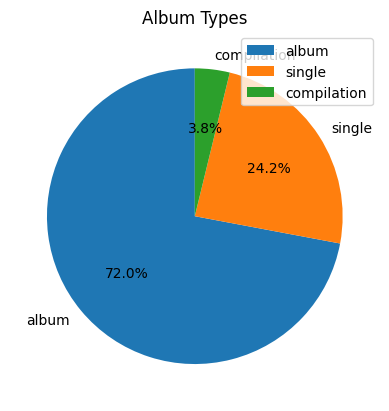

In [ ]:
# Create a pie chart
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Album Types')
plt.legend(labels, loc='best')

plt.show()

In [ ]:
licensed_counts = df['Licensed'].value_counts()
print(licensed_counts)

True     14610
False     6108
Name: Licensed, dtype: int64


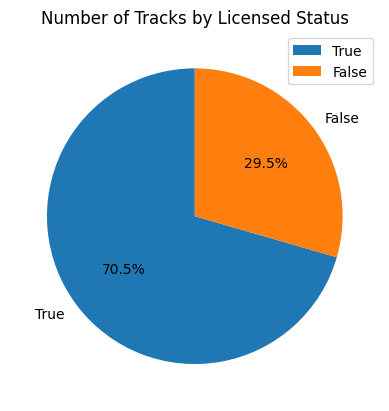

In [ ]:
# Create a pie chart
labels = licensed_counts.index.tolist()
sizes = licensed_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Number of Tracks by Licensed Status')
plt.legend(labels, loc='best')
plt.show()

#### 1.3 Nhận xét
- Từ biểu đồ Album Types ta thấy hơn 70% bài hát được phát hành trên Spotify nằm trong album. Bên cạnh  đó các bài hát phát hành dưới dạng single cũng chiếm một số lượng không nhỏ (24.2%).
- Từ biểu đồ Licensed ta thấy các bài hát chưa được cấp phép chiếm một tỉ lệ không nhỏ (29.5%). 

### 2. Bar chart

#### 2.1 Lí do chọn biểu đồ
- BarChart là một biểu đồ sử dụng các cột dọc để biểu diễn dữ liệu. Mỗi cột tương ứng với một giá trị hoặc một nhóm giá trị và độ cao của cột biểu thị giá trị đó. BarChart thường được sử dụng để so sánh các giá trị hoặc nhóm giá trị với nhau.
- Đối với loại biểu đồ này, nhóm quyết định trực quan top bài hát được phát nhiều nhất trên Spotify theo các trường Energy, Dancebility, Accousticness, Valence.
- Ta có thể thấy trường stream có tính định lượng và các trường dữ liệu Energy, Dancebility, Accousticness, Valence có tính chất phân loại và chỉ có 4 trường nên việc biểu diễn bằng 
BarChart là rất phù hợp.
- Nhóm chúng em quyết định sử dụng biểu đồ BarChart để trực quan top bài hát được phát nhiều nhất trên Spotify theo các trường Energy, Dancebility, Accousticness, Valence vì các thuộc tính này là thuộc tính của một bài hát nên khi sử dụng BarChart sẽ giúp ta dễ dàng so sánh cũng như nhìn thấy xu hướng của tập dữ liệu (người dùng thường có xu hướng thích những bài hát với thuộc tính như thế nào,... ) dựa trên những thuộc tính này.

#### 2.2 Code

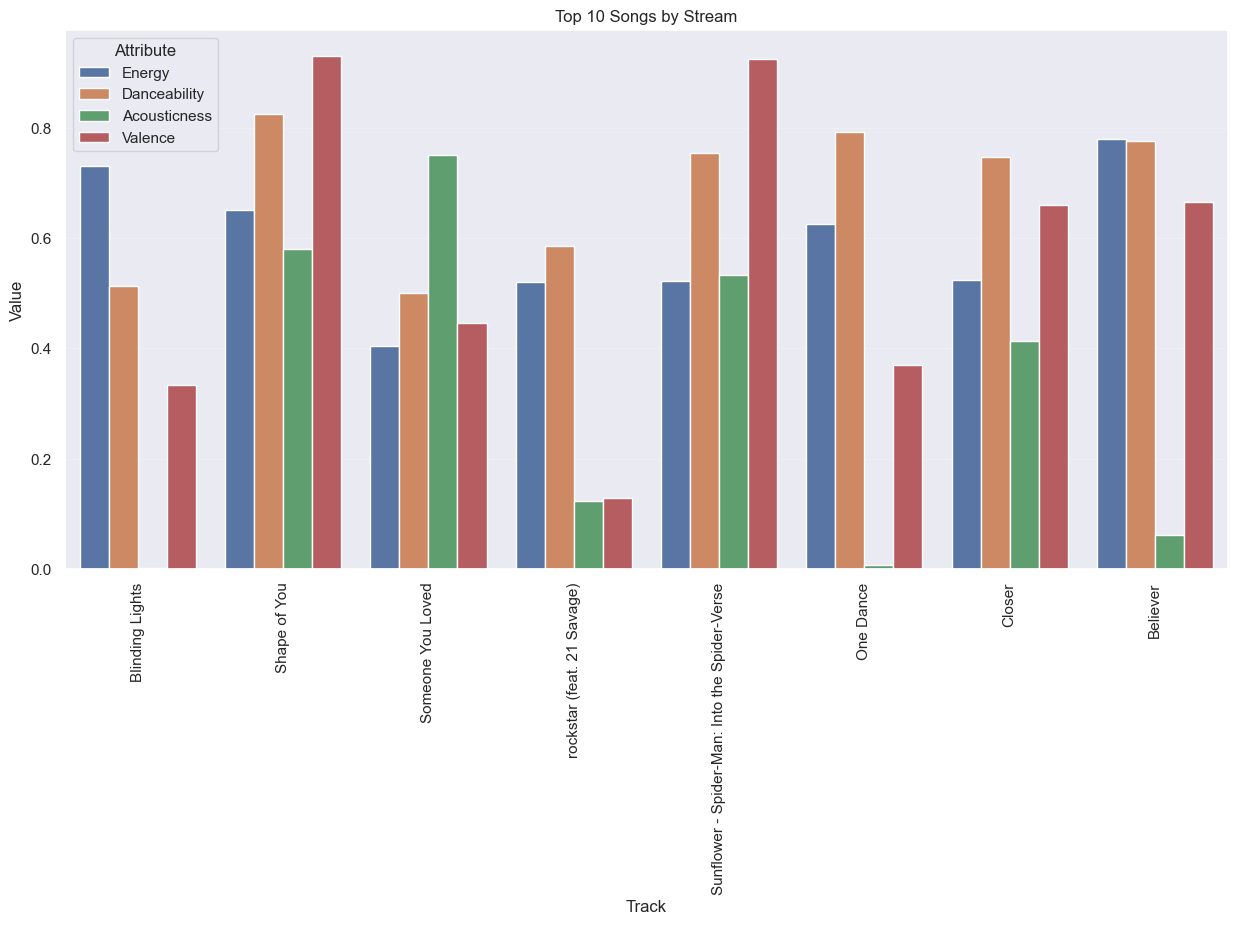

In [ ]:
top_songs = df.sort_values('Stream', ascending=False).head(10)
top_songs[['Track', 'Energy', 'Danceability', 'Acousticness', 'Valence']]
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness', 'Valence'],
                                var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')
sns.set(context="notebook", rc={"figure.figsize":(15, 7), "axes.grid":True, "grid.linewidth":0.5, "grid.alpha":0.3})
sns.barplot(x="Track", y="Value", hue="Attribute", data=top_songs_melt)


# plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1),title='Attribute')
plt.title('Top 10 Songs by Stream')
plt.xlabel('Track')
plt.ylabel('Value')

plt.xticks(rotation=90)
plt.show()

#### 2.3 Nhận xét
- Các bài hát đều được nghe nhiều trên Spotify thường có Energy, Danceability cao nên các bài hát này thường có nguồn năng lượng cao, tốc độ nhịp điệu nhanh và độ đa dạng âm thanh phong phú, điều này làm cho bài hát trở nên dễ nhớ và có thể kích thích người nghe nhảy múa.
- Người nghe thường xen lẫn giữa việc nghe các bài hát điện tử và các bài hát truyền thống có sự sự xuất hiện của các nhạc cụ truyền thống như guitar acoustics, piano, violin, trumpet, hay giọng hát tự nhiên của ca sĩ (Acousticness).
- Các bài hát trên đa số đều có chỉ Valence cao nên đều mang sự hạnh phúc, niềm vui và sự phấn khích cho người nghe.

### 3. Box plot

#### 3.1 Lí do chọn biểu đồ
- Box plot (hay còn gọi là biểu đồ hộp độc lập) là một biểu đồ thống kê được sử dụng để trình bày một tập dữ liệu dưới dạng năm số liệu trung tâm (min, Q1, median, Q3, max) và các giá trị ngoại lai (outlier). Box plot thường được sử dụng để mô tả phân phối của dữ liệu và cho phép so sánh giữa các tập dữ liệu khác nhau.
- Các trường dữ liệu Energy, Danceability, Acousticness, Liveness trong dataframe SpotifyMusic có tính chất dữ liệu số định lượng và phân bố không đồng đều. Do đó, việc sử dụng biểu đồ Box chart (hay còn gọi là Box plot) sẽ rất hữu ích để trực quan hóa và phân tích dữ liệu này.
- Nhóm quyết định sử dụng Box Plot trực quan thống kê các trường Energy, Danceability, Acousticness, Liveness

#### 3.2 Code

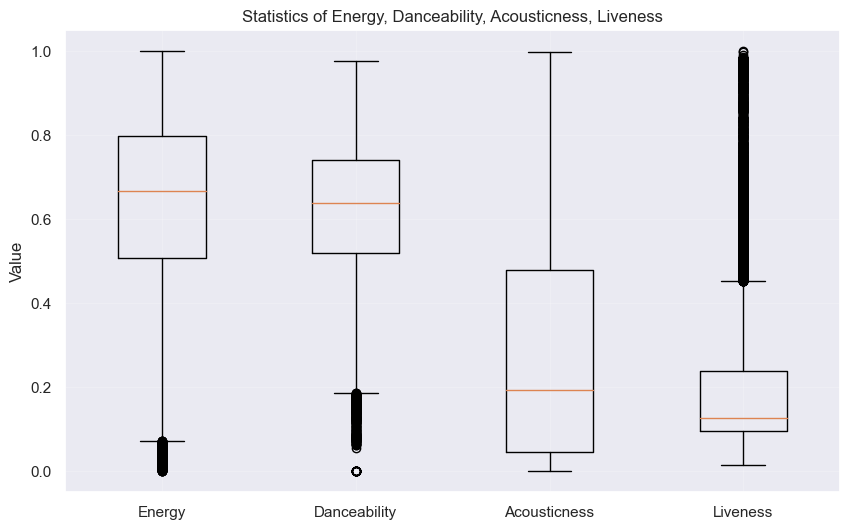

In [ ]:
cols = ['Energy', 'Danceability', 'Acousticness', 'Liveness']
data = df[cols]
plt.rcParams['figure.figsize'] = (10,6)
# Create box plot
plt.boxplot(data.values, labels=data.columns)
plt.title('Statistics of Energy, Danceability, Acousticness, Liveness')
plt.ylabel('Value')
plt.show()

#### 3.3 Nhận xét
- Ta thấy Accousticness có hộp dài chứng tỏ có sự phân tán dữ liệu lớn.
- Trường Danceability có hộp ngắn nhất nên có sự phân tán dữ liệu nhỏ nhất
- Ta thấy phạm vi giá trị của trường Liveness lớn nên ta có thể suy đoán rằng trường này có mức độ phân tán lớn.

### 4. Histogram

#### 4.1 Lí do chọn biểu đồ
- Histogram là một biểu đồ thống kê sử dụng các cột dọc để biểu diễn phân phối tần suất của một tập dữ liệu liên tục. Các cột của histogram được đặt kề nhau và có độ rộng bằng nhau để biểu thị các khoảng giá trị của dữ liệu. Histogram thường được sử dụng để phân tích và mô tả phân phối của dữ liệu và cho phép xác định các đặc điểm của phân phối như trung tâm, độ phân tán và hình dạng.
- Histogram là một biểu đồ thích hợp để trực quan hóa phân bố của một biến số liên tục. Trường "Loudness" trong data frame SpotifyMusic cũng là một biến số liên tục, do đó việc sử dụng biểu đồ Histogram là phù hợp để có cái nhìn tổng quan về phân bố của trường dữ liệu này
- Nhóm quyết định sử dụng Histogram trực quan trường Loudness.
- Biểu đồ Histogram sẽ giúp ta hiểu rõ hơn về tần số xuất hiện của các giá trị "Loudness" khác nhau và phân bố của chúng trên một trục giá trị liên tục.

#### 4.2 Code

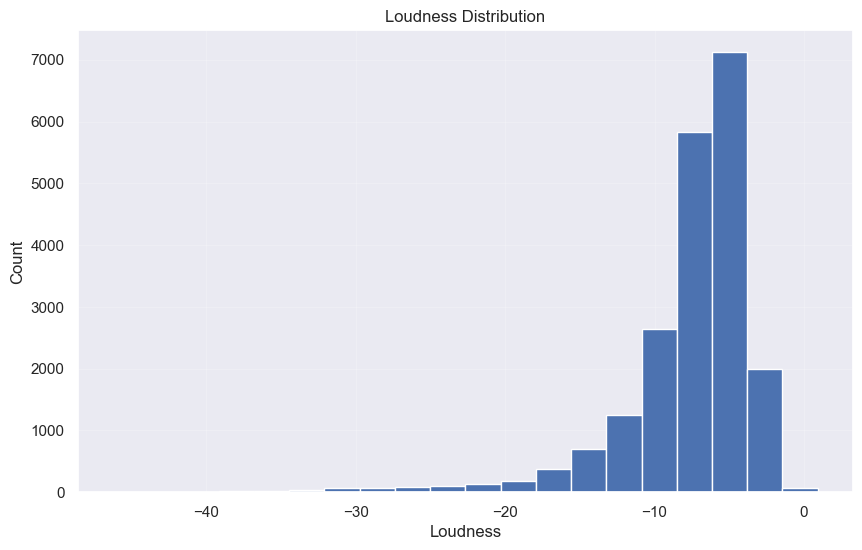

In [ ]:
# Create a histogram of Loudness
plt.hist(df['Loudness'], bins=20)
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.title('Loudness Distribution')
plt.show()

#### 4.3 Nhận xét
- Độ ồn của bài hát nằm trong khoảng -40 dB đến 0 dB.
- Người nghe thường có xu hướng thích những bài hát có độ ồn cao đặc biệt là 4dB - 8dB.
- Số bài hát có độ ồn khoảng -5 dB rất nhiều, đây là mức độ ồn khá cao, gần mức tối đa (0 dB), rất ảnh hưởng đến người nghe.
- Số bài hát có độ ồn thấp chiếm số lượng rất ít.

### 5. Stacked vertical bar chart

#### 5.1 Lí do chọn biểu đồ
- Stacked vertical bar chart là một loại biểu đồ cột dọc, trong đó các cột được xếp chồng lên nhau để biểu thị sự phân bố của các giá trị con bên trong các nhóm lớn hơn. Mỗi cột sẽ được chia thành các phần nhỏ hơn tương ứng với giá trị con, và tất cả các phần này sẽ được xếp chồng lên nhau để tạo thành một cột thống kê toàn bộ giá trị của nhóm lớn hơn. Điều này giúp thể hiện sự phân bố tương quan giữa các giá trị con trong một nhóm và giữa các nhóm khác nhau.
- Biểu đồ Stacked vertical bar chart thường được sử dụng để trực quan hóa sự phân bố của một biến số qua các nhóm và nhóm ở đây chúng em quyết định chọn là Album_type, Licensed.
- Nhóm có quyết định này vì nhóm muốn hiển thị số lượng album được cấp phép và không được cấp phép cho từng loại Album_type và từ đó giúp nhóm thấy được tổng số lượng album được phát hành dưới mỗi loại Album_type. Từ đó giúp nhóm có cái nhìn tổng quan hơn về sự phân bổ của các album theo từng loại Album_type và các trạng thái được cấp phép


#### 5.2 Code

In [ ]:
licensed = []
unlicensed = []
for song_type in df['Album_type'].unique():
    licensed.append(len(df[(df['Album_type'] == song_type) & (df['Licensed'])]))
    unlicensed.append(len(df[(df['Album_type'] == song_type) & (~df['Licensed'])]))


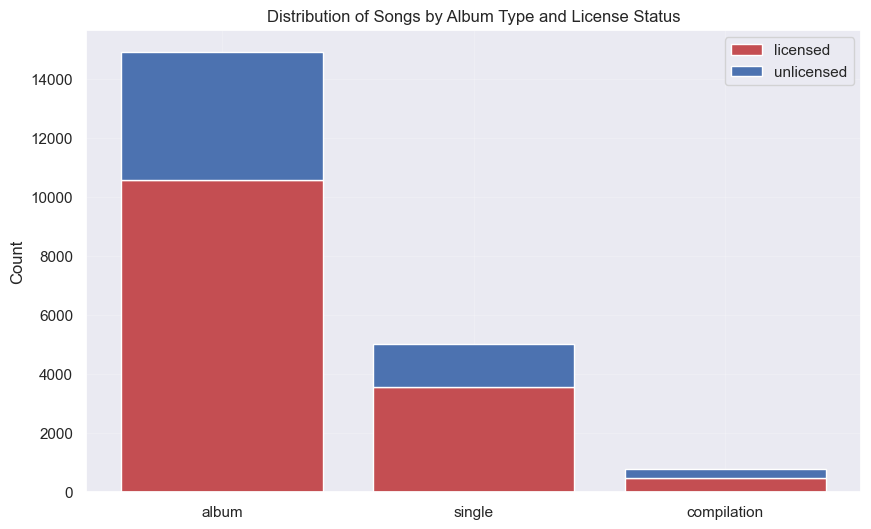

In [ ]:
fig, ax = plt.subplots()

ax.bar(df['Album_type'].unique(), licensed, color='r',label='licensed')
ax.bar(df['Album_type'].unique(), unlicensed, bottom=licensed, color='b', label='unlicensed')
ax.set_ylabel('Count')
ax.set_title('Distribution of Songs by Album Type and License Status')
ax.legend()
plt.show()

#### 5.3 Nhận xét
- Với cả 3 thể loại album thì số lượng bài hát được cấp phép nhiều hơn số lượng bài chưa được cấp phép
- Bài hát được phát hành theo album có số lượng nhiều nhất, tiếp theo là đĩa đơn, cuối cùng là tổng hợp.
- Số lượng album được cấp phép chiếm số lượng lớn nhất, nhiều hơn rất nhiều so với những loại khác 

## 6. Scatter plots:
### 6.1: Lí do chọn biểu đồ: 
- Scatter plot là một loại biểu đồ thống kê được sử dụng để biểu diễn mối quan hệ giữa các biến số. 
Trên biểu đồ này, mỗi điểm dữ liệu sẽ được đại diện bởi một chấm trên đồ thị, nơi trục x thể hiện
giá trị của biến số độc lập, còn trục y thể hiện giá trị của biến số phụ thuộc.
- Các trường dữ liệu Energy, Loudness và Danceability trong data frame SpotifyMusic đều là các biến số liên tục và không rời rạc. Vì vậy, chúng ta có thể sử dụng biểu đồ Scatter plots để hiển thị mối quan hệ giữa chúng. Chính vì thế nhóm chúng em quyết định chọn Scatter plot để trực quan những trường dữ liệu này. 
- Các trường dữ liệu Likes, Comments cũng có tính chất tương tự nên chúng em cũng chọn chọn Scatter plot để trực quan những trường dữ liệu này. 
- Biểu đồ Scatter plot được nhóm sử dụng để trực quan sự phân bố của các điểm dữ liệu trên mặt phẳng với trục hoành, trục tung tương ứng cũng như độ lỡn với các biến số. Từ đó phân tích mối quan hệ giữa các biến số Energy, Loudness, Danceability, xem liệu chúng có tương quan với nhau hay không.


### 6.2: Code

#### a/Sự ổn định của bài hát:

Chúng ta sẽ chọn 3 cột để thể hiện sự ổn định của bài hát, đó là cột Energy, Loudness và Danceability. Đối với biểu đồ này thì mỗi điểm sẽ đại diện cho 1 bài hát trong dataset, với trục hoành là số đo Energy và trục tung là độ lớn Loudness và kích thước (độ đậm nhạt) của điểm sẽ đại diện cho Danceability.

Text(0.5, 1.0, 'The stability of the song')

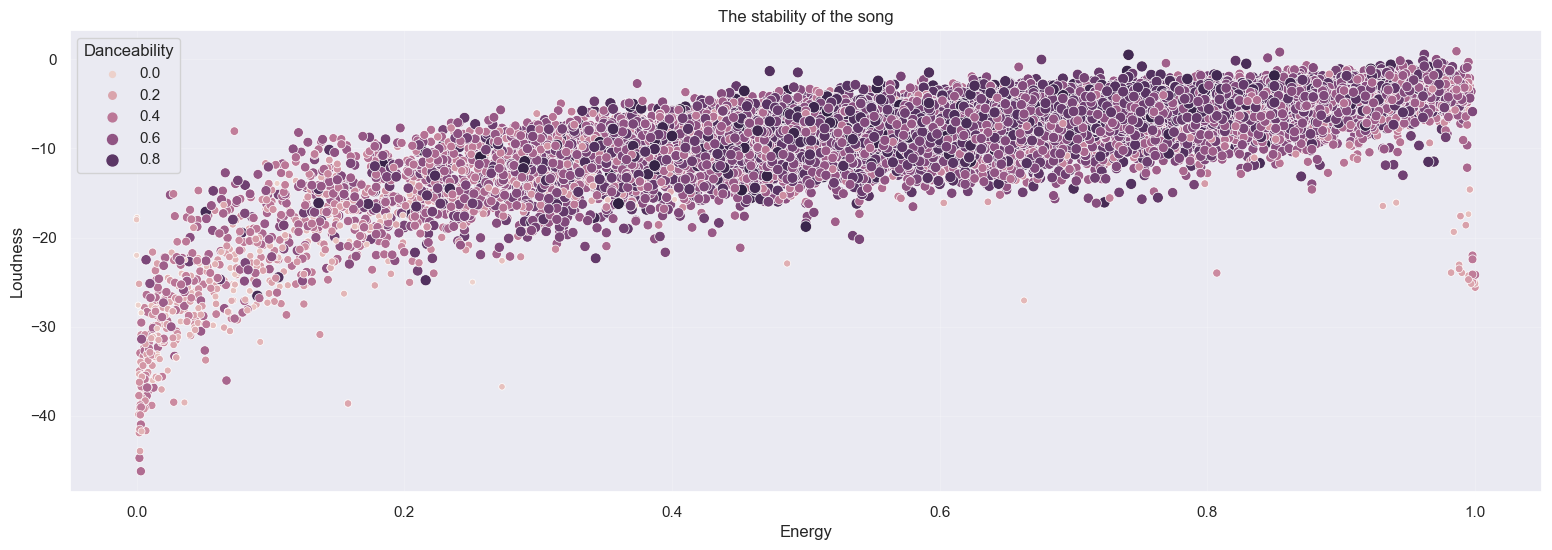

In [ ]:
plt.rcParams['figure.figsize'] = (19,6)
sns.scatterplot(data= df, x="Energy", y="Loudness", size="Danceability",hue="Danceability");
plt.title('The stability of the song')


#### Nhận xét: 
 - Từ biểu đồ này, ta có thể thấy rằng các bài hát có Energy, Loudness và Danceability cao thường có xu hướng tập trung ở phía trên bên phải của đồ thị.
 - Điều này cho thấy rằng các bài hát có sự kết hợp tốt giữa các yếu tố như tempo, độ ồn và độ ổn định của nhịp điệu, từ đó tạo ra những bài hát thú vị và dễ nhảy.
 - Trong khi đó, các bài hát có Energy, Loudness và Danceability thấp thường tập trung ở phía dưới bên trái của đồ thị, cho thấy rằng các yếu tố này thường không được kết hợp tốt, dẫn đến những bài hát tẻ nhạt và ít nổi bật.

#### b/Mức độ tương tác của bạn hát: 

Chọn ra 2 cột để thể hiện mối tương quan này là cột Likes và cột Comments.

Đổi các ký tự '$' trong tên bài hát thành ký tự 'S'

In [ ]:
df["Track"] = df["Track"].apply(lambda x: x.replace('$','S'))

Top 50 bài hát có lượt views nhiều nhất

In [ ]:
top_50 = df.drop_duplicates(subset='Track',keep='first').sort_values('Views', ascending=False).head(50)

In [ ]:
top_50.drop_duplicates(subset='Track',keep='first',inplace=True)

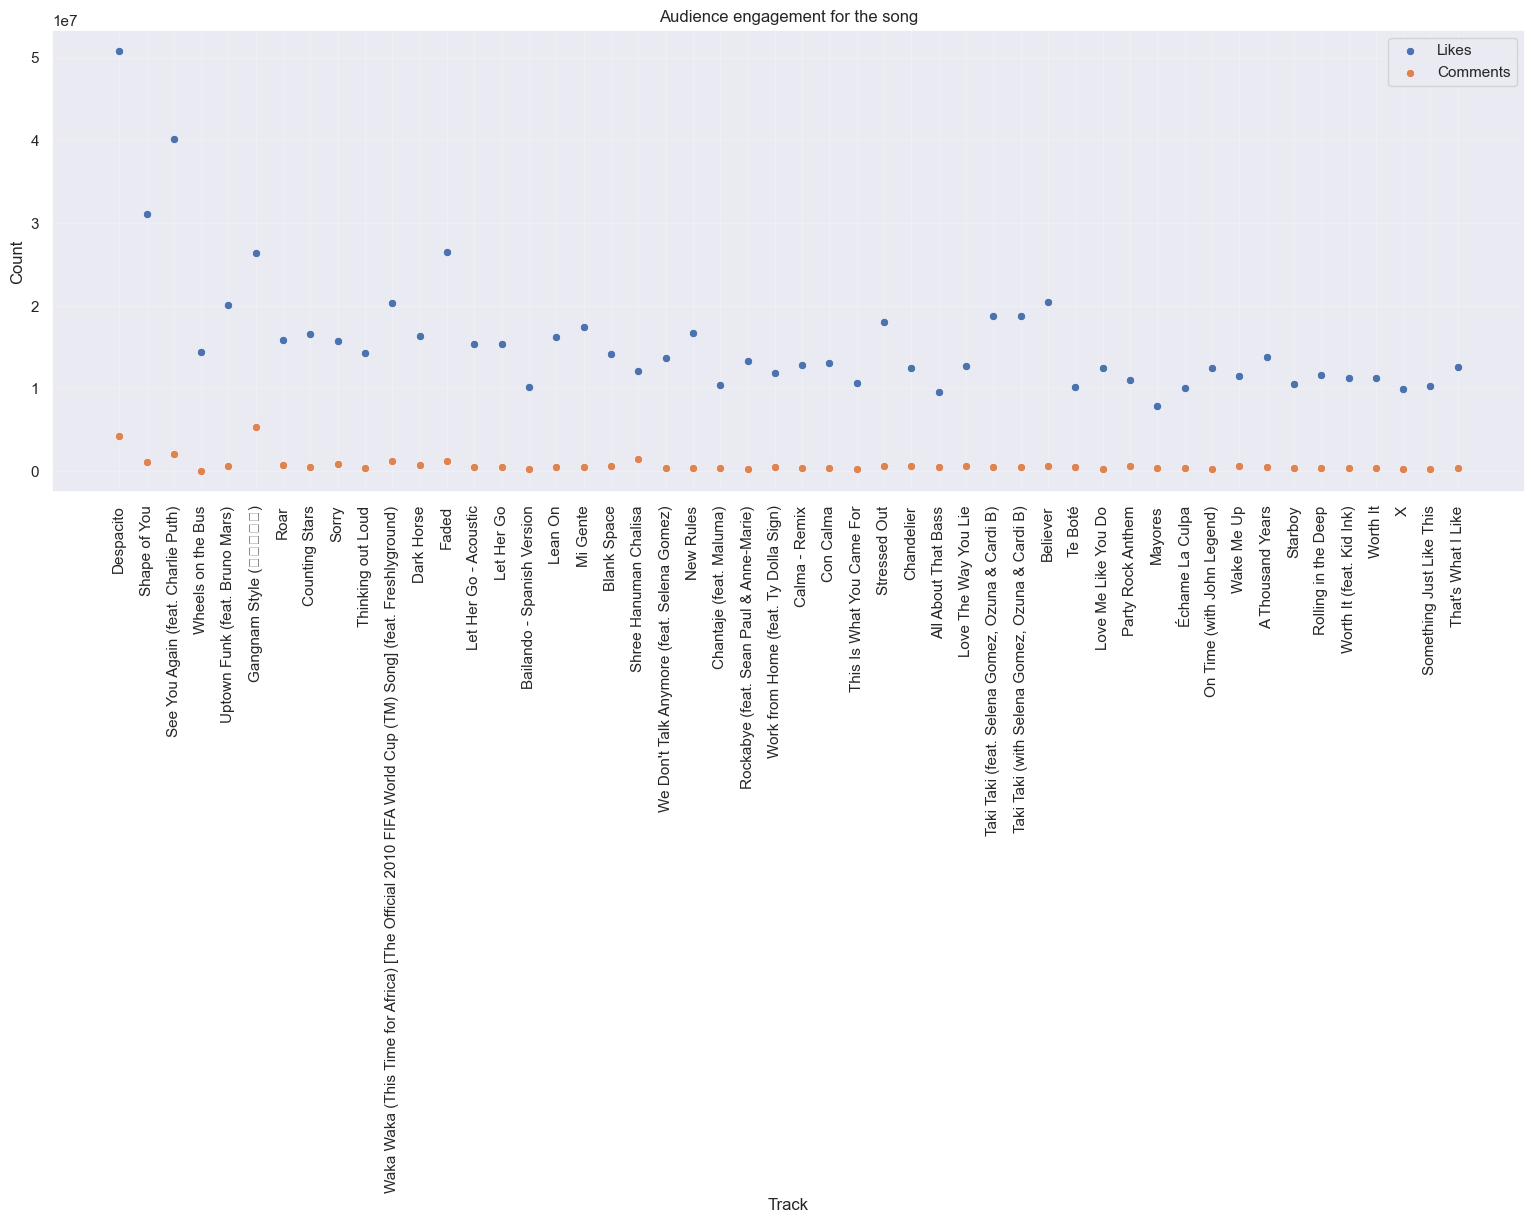

In [ ]:

plt.rcParams['figure.figsize'] = (19,6)
sns.scatterplot(data=top_50, x="Track", y="Likes", label="Likes")
sns.scatterplot(data=top_50, x="Track", y="Comments", label='Comments')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Audience engagement for the song')
plt.legend()
plt.show()

#### Nhận xét: 
 - Các giá trị trong cột Views cho chúng ta biết số lần video đã được xem, trong khi các giá trị trong cột Likes và Comments cho chúng ta biết mức độ thích và phản hồi của người dùng đối với video.
 - Cột Likes và Comments là hai thuộc tính quan trọng của một video trên YouTube, thể hiện sự tương tác của người xem với nội dung video đó. Quan hệ giữa hai cột này thường phản ánh mức độ phổ biến và thu hút của video.
 - Video có nhiều lượt thích, điều này có thể chỉ ra rằng nội dung video đó được đánh giá cao và được yêu thích bởi người xem. Tuy nhiên, nếu số lượng bình luận thấp, điều này có thể cho thấy video không tạo ra nhiều sự thảo luận hoặc phản hồi tích cực từ khán giả.
 - Ngược lại, video có nhiều bình luận, điều này có thể chỉ ra rằng nội dung video đã kích thích sự tương tác và thảo luận giữa khán giả. Tuy nhiên, nếu số lượng lượt thích thấp, điều này có thể cho thấy video không được đánh giá cao và được yêu thích bởi người xem.
 - Quan hệ giữa cột Likes và Comments phụ thuộc vào nội dung video và cảm nhận của khán giả về nội dung đó. Tuy nhiên, nếu một video có nhiều lượt thích và bình luận đồng thời, điều này có thể cho thấy video đã tạo ra sự tương tác tích cực và thu hút được sự quan tâm của đông đảo người xem.
 - Từ biểu đồ có thể thấy là top 50 bài hát trên chỉ khác nhau về lượt likes và comments thì chỉ riêng 1 vài bài hát là cao hơn. Có thể thấy các bài hát thu hút sự tương tác và thảo luận của khán giả không chênh lệch nhiều, chứng tỏ sức hút của top các bài hát.

## 7. Radar chart

### 7.1. Lí do chọn biểu đồ
- Radar chart là biểu đồ dùng để so sánh giữa 2 hay nhiều đối tượng có cùng biến
- Radar chart thường được sử dụng để so sánh nhiều thông số trong cùng một đơn vị. Trong trường hợp này, các thông số là (Energy, Danceability, Loudness, Valence, Acousticness) của các bài hát có lượt nghe nhiều nhất, ít nhất và trung bình. Chính vì vậy sử dụng Radar chart là hợp lý.
- Nhóm muốn so sánh các thông số của các bài hát có lượt nghe nhiều nhất, ít nhất và trung bình để rút ra yếu tố nào ảnh hưởng đến sự phổ biến của 1 bài hát.

### 7.2. Code

C:\Users\Quang(Shelter-Waang)\AppData\Local\Temp\ipykernel_8208\1393731479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Sum'] = df_new['Views'] + df_new['Stream']


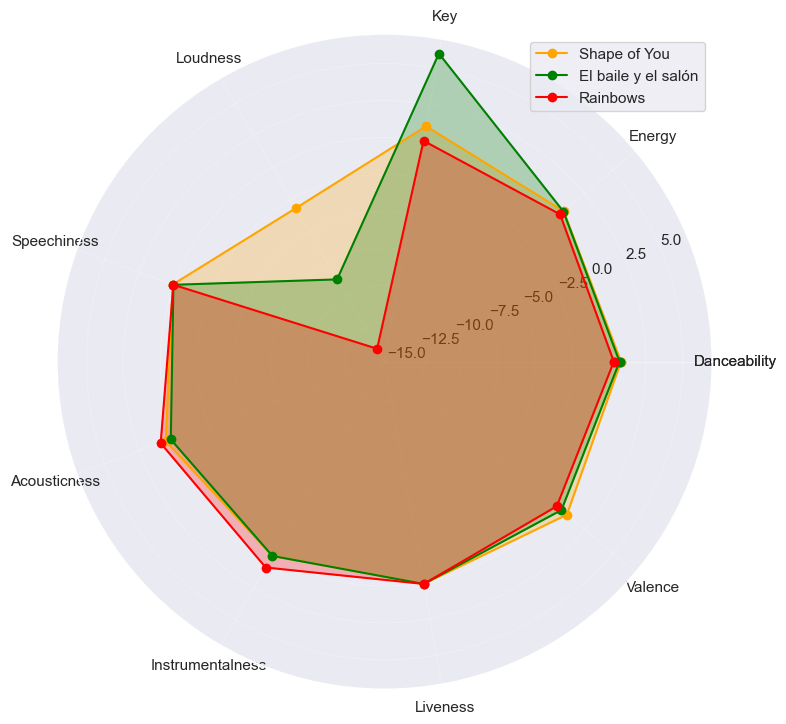

In [ ]:
df_new = df.drop_duplicates(subset='Track', keep='first')
df_new['Sum'] = df_new['Views'] + df_new['Stream']
df_new = df_new.sort_values('Sum', ascending=False)
df_new = df_new.loc[:, ['Track', 'Danceability', 'Energy',
                        'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
                        'Liveness', 'Valence', 'Tempo']]

data_plot = df_new.iloc[[1, len(df_new)/2, -1], :-1]

labels = list(data_plot.columns[1:])
labels.append(labels[0])

first_song = data_plot.iloc[0].values[1:]
last_song = data_plot.iloc[1].values[1:]

angles = np.linspace(0, 2*np.pi, len(labels) - 1, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

# draw
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

colors = ['orange', 'green', 'red']
for i in range(len(data_plot)):
    ax.plot(angles, np.concatenate((data_plot.iloc[i].values[1:], [
            data_plot.iloc[i].values[1:][0]])), 'o-', color=colors[i], label=data_plot.iloc[i].values[0])
    ax.fill(angles, np.concatenate((data_plot.iloc[i].values[1:], [
            data_plot.iloc[i].values[1:][0]])), color=colors[i], alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.grid(True)


plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()


### 7.3. Nhận xét:
- Các chỉ số hầu như là tương đồng với nhau, ngoại trừ Loudness và Key
- Loudness càng cao thì lượt nghe càng nhiều
- Chỉ số Valence, Energy, Danceability càng cao thì lượt nghe càng nhiều -> người nghe thích nghe những bài hát có âm hưởng tích cực, vui tươi -> kéo theo chỉ số Acousticness (độ mộc mạc của âm thanh) càng thấp thì càng nhiều người nghe, vì nó được phối bởi nhiều loại nhạc cụ điện tử
- Những bài hát có Key (tone) quá cao khó tiếp cận với người nghe

### 8. Cluster Heatmap

#### 8.1: Lí do chọn biểu đồ: 
- Heatmap là một biểu đồ đặc biệt được sử dụng để trực quan hóa dữ liệu số. Nó thể hiện dữ liệu theo màu sắc trên một ma trận hai chiều, với mỗi giá trị dữ liệu được mã hóa thành một màu sắc khác nhau. Mỗi hàng và cột của ma trận đại diện cho một biến số trong dữ liệu và mỗi ô trong ma trận đại diện cho sự tương quan giữa hai biến số. Heatmap thường được sử dụng để phát hiện mối quan hệ giữa các biến số trong dữ liệu.
- Nhóm chúng em quyết định sử dụng Heatmap để trực quan vì nó giúp nhóm dễ dàng quan sát và hiểu được mức độ tương quan giữa các biến số của dataframe. Biểu đồ Heatmap thể hiện các giá trị của các biến số dưới dạng màu sắc khác nhau, giúp nhóm dễ dàng phát hiện ra các giá trị lớn và nhỏ trong tập dữ liệu cũng như phát hiện mối quan hệ giữa các biến số.

#### 8.2 Code

C:\Users\Quang(Shelter-Waang)\AppData\Local\Temp\ipykernel_8208\4096655240.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


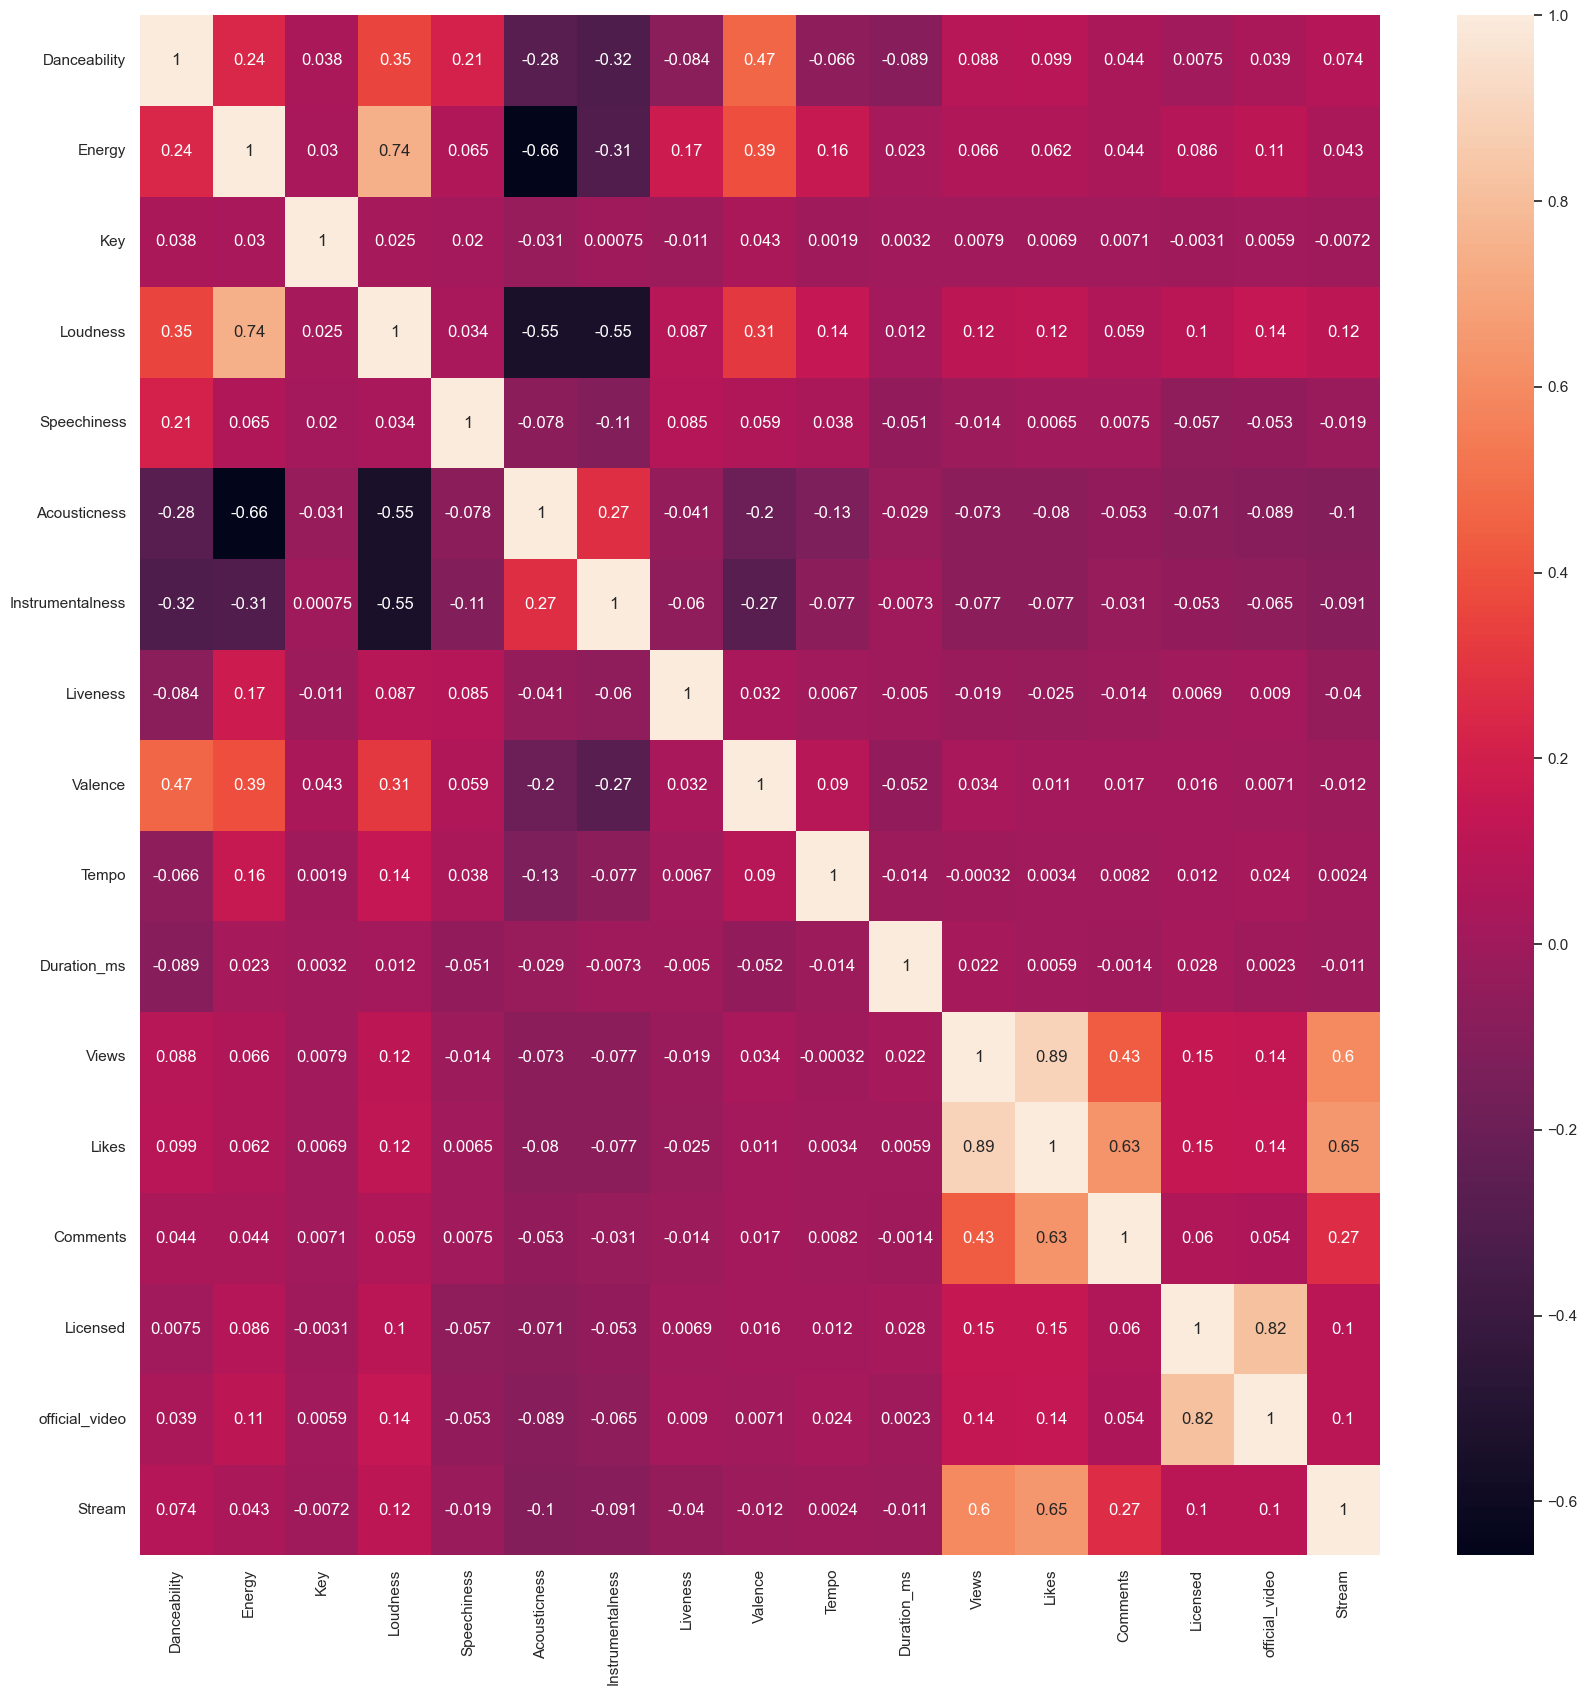

In [ ]:
fig=plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
fig.show()

#### 8.3 Nhận xét
- Đối với những ô có màu càng đậm, chúng tỏ sự phụ thuộc giữa các trường càng
ít, mối liên quan lẫn nhau càng ít.
- Đối với những ô có màu càng nhạt, sự phụ thuộc, liên quan và tác động với nhau
càng lớn.
- Ta có thể thấy mối tương quan giữa lượt Views với Comments, Likes và Stream cực kì mạnh (những video có lượt Views cao thì lượt comments, likes và stream cũng cao theo và ngược lại).
- Ta thấy cái thuộc tính của một video có mối tương quan với lượt xem khá thấp chứng tỏ các thuộc tính này không ảnh hưởng quá nhiều đến lượt xem của một bài hát